# Generate initial designs for training data for ART

In [1]:
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt

from ipywidgets import interact, widgets

All genes we might consider in relation to isopentenol production:

In [11]:
genes = ['ACCOAC', 
         'POX', 
         'PTAr', 
         'CS', 
         'ACACT1R', 
         'PPC', 
         'PPCK', 
         'PFL', 
         'PYK', 
         'MDH']

Types of genetic modifications: 
- knockout (KO)
- no modification (NoMod)
- doubling the expression (UP)

In [6]:
modif_dict = {'KO': 0, 
              'NoMod': 1,
              'UP': 2}

How many genes you want to consider?

In [8]:
n_genes = int(input())


 8


How many instances you want to generate?

In [9]:
n_instances = int(input())

 100


In [12]:
n_modifications = len(modif_dict)
genes = genes[:n_genes]
tot_number_mod = n_modifications**n_genes
print(f'Total number of possible modifications: {tot_number_mod}')
trainingset = n_instances/tot_number_mod*100
print(f'Training set size: {n_instances} ({trainingset:.2f}%)')

Total number of possible modifications: 6561
Training set size: 100 (1.52%)


In [8]:
df = pd.DataFrame(columns=genes)
df.insert(loc=0, column='Line Name', value=None)

Define wild type strain with no modifications:

In [10]:
df.loc[0] = ['WT'] + [modif_dict['NM'] for i in range(n_genes)] 
df

,Line Name,ACCOAC,POX,PTAr,CS,ACACT1R,PPC,PPCK,PFL
0,WT,1,1,1,1,1,1,1,1


### Assign designs for the training set randomly

In [11]:
for i in range(1,n_instances):
    df.loc[i] = [str(i)] + [randrange(3) for i in range(n_genes)]
                            
df.head()

,Line Name,ACCOAC,POX,PTAr,CS,ACACT1R,PPC,PPCK,PFL
0,WT,1,1,1,1,1,1,1,1
1,1,0,2,1,0,2,2,2,2
2,2,0,2,0,2,1,2,1,0
3,3,1,0,1,0,2,1,1,0
4,4,2,2,0,2,0,1,0,1


How many modifications 'introduced' into each strain?

In [12]:
def num_of_modifications(df):
    num_instances = len(df)
    values = np.empty(num_instances)
    for i in range(num_instances):
        design = df.loc[i][1:]
        values[i] = list(design).count(0) + list(design).count(2)
    return values
            

In [13]:
df['# Modifs'] = num_of_modifications(df)
df.head()

,Line Name,ACCOAC,POX,PTAr,CS,ACACT1R,PPC,PPCK,PFL,# Modifs
0,WT,1,1,1,1,1,1,1,1,0.0
1,1,0,2,1,0,2,2,2,2,7.0
2,2,0,2,0,2,1,2,1,0,6.0
3,3,1,0,1,0,2,1,1,0,4.0
4,4,2,2,0,2,0,1,0,1,6.0


Find distribution of modifications per gene in the training data set:

In [14]:
df.loc[(n_instances+1)] = ['Summary'] + [[list(df[gene]).count(int(i))/n_instances*100 
                                            for i in range(n_modifications)]  for gene in genes] + [np.mean(df['# Modifs'])]


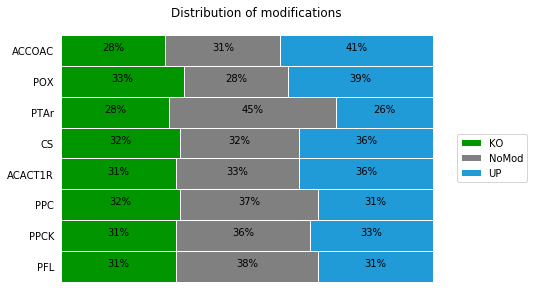

In [15]:
segments = 3
height = 1
labels = ['KO', 'NoMod', 'UP']
colors = ['#019600', 'grey', '#219AD8']

data = [ [df[df['Line Name']=='Summary'][g].values[0][num] for g in genes] 
        for num in range(3)]
y_pos = np.arange(len(genes))

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

# Remove frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

patch_handles = []
# left alignment of data starts at zero
left = np.zeros(len(genes)) 
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
                                 color=colors[i%len(colors)], edgecolor='white',
                                 height=height, align='center', 
                                 left=left, label=labels[i]))
    left += d

# search all of the bar segments and annotate
for j in range(segments):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (data[j][i]), ha='center')

ax.set_title('Distribution of modifications')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', 
                labelbottom='off')
plt.yticks(y_pos, genes)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Save training set:

In [17]:
df.loc[0:n_instances].to_csv(f'./data/training_data_{n_genes}genes.csv', 
                             columns = ['Line Name'] + genes, 
                             header = True, index = False)